## A/B Testing in Digital Marketing Campaigns

In practice, we often encounter this problem, ready to go online with the new campaign will really be better than the old one? Encountering these problems always makes people at a loss for words, is it really only when things do not decide quantum mechanics?

In the data-driven era, as long as you encounter the problem of quantifiable data, there really is such a universal tool to answer your confusion, it is A/B Test.

The idea of A/B Test was initially applied in traditional academic research fields such as chemistry, biology, medical treatment, etc., called double-blind experiment, which was introduced by Google in 2000 to conduct the first A/B Test in the Internet. A/B Test solves the problem of not determining which program is better under the existing cognition and avoids head-shaking decision-making, so what is the appropriate scenario to do A/B Test?

First of all, there are two conditions:
- There are two to more options to be selected;
- There are the most direct data indicators to measure the options to be selected, such as: ratio, value.

Currently, the more common application scenarios of A/B Test are as follows: new function verification, calculation algorithm, UI layout, operation strategy, copywriting.

There are many cases about A/B Test, the most common is just a button colour or button copy, although very classic but too simple, so that some places involved in the experimental knowledge points can not be developed in detail. Today we will take a work in the actual example to give an example:

A product would like to pay to publish the emoji function, so the product manager A designed a set of payment guidance process: click on the emoji button -> pop-up payment guidance pop-up window -> click on the payment pop-up window payment button -> payment success.

In the requirement review, product manager B put forward a different opinion: why not pop up the payment pop-up window when the user clicks on a specific emoji, and use the following guidance logic: click on the emoji button -> pop-up emoji panel -> click on a specific emoji -> pop-up payment guidance pop-up window -> click on the payment pop-up window to pay button -> payment success.

Based on the above logic, the conversion funnel for the two scenarios is as follows:

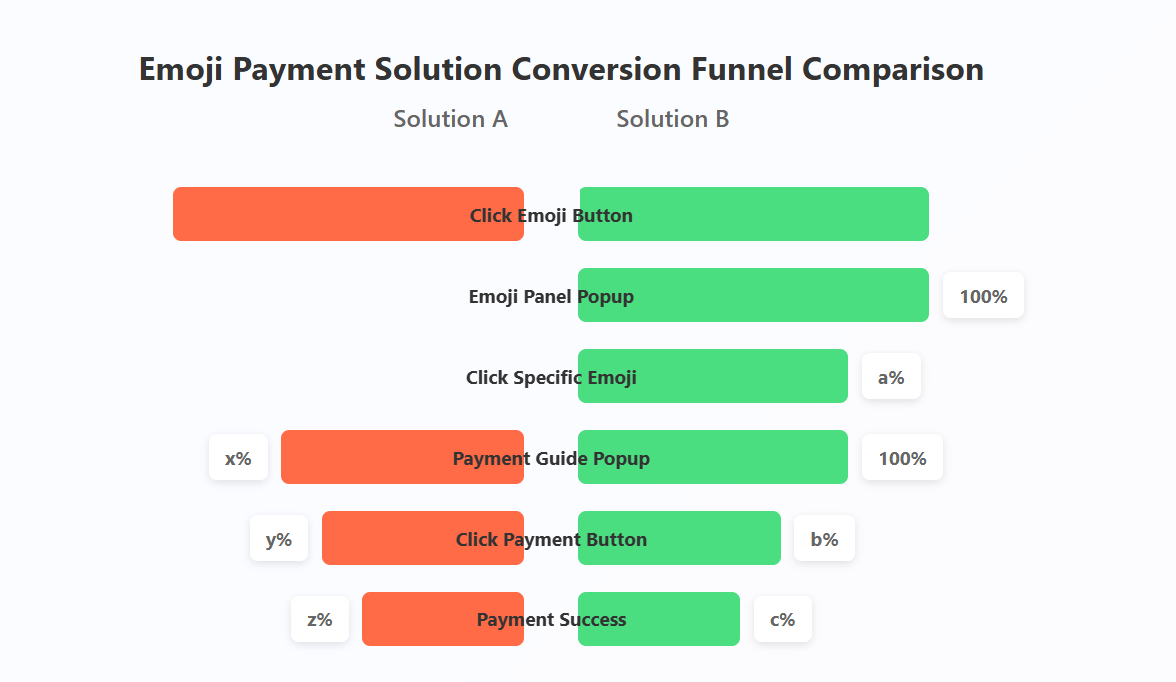

In [6]:
from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/images/funnel.jpg', width=700))

Assuming: number of people clicking on the emoji button = n, then the number of paid lead pop-up users seen by the two scenarios are:

Scenario A: number of people who saw the paid lead popup = n * x%

Scenario B: number of people who saw the paid lead popup = n * 100% * a% * 100% = n * a%

The number of paid users are respectively:

A plan number of paid users = A plan to see the number of paid guidance pop-ups * y% * z% = n * x% * y% * z%

B plan number of paid users = B plan to see the number of paid guidance pop-ups * b% * c% = n * a% * b% * c%,

For the advantages and disadvantages of the two options, different product managers could not reach agreement, and finally decided to do an A/B Test to see the user's real choice.

**A/B Testing Design and Evaluation Guide**

---

### 1. Version Design

When designing experimental versions, follow the principle of **single-variable change**. Avoid modifying multiple elements simultaneously (e.g., changing both the button color and text). The simpler the experiment, the easier it is to draw valid conclusions.

---

### 2. Experiment Duration

Industry practices recommend running experiments for **2–3 weeks**, with the **minimum duration no less than 7 days** to cover weekly user behavior patterns. While a longer duration can smooth out fluctuations, an **overly long experiment** may dilute the differences between versions.

> For example, a novel feature like a zero-cost lucky draw might initially attract users due to novelty. Over time, its appeal could fade, making early experimentation more insightful than extended studies.

Experiments should focus on **rapid validation and iteration**, as their results are **time-sensitive** and not universally applicable.

---

### 3. Metric Selection

Each UI or UX change may affect multiple indicators:

* **Direct metrics** (e.g., click-through rates on the pay button) are core to evaluating success.
* **Indirect metrics** (e.g., average session duration, retention) reflect user experience side effects.

Use **conversion rates** (e.g., pay button clicks / emoji button clicks) rather than absolute numbers to adjust for differing group sizes or filters applied across groups.

> Strategy alignment is key: if the product's target is revenue, a version with increased engagement and higher revenue can be deployed—even if it reduces user activity. But if the current focus is daily active users (DAUs), proceed with caution.

---
### 4. Case Example
Based on the example described earlier, the most direct key metric is the number of users who click the payment button in the payment prompt. However, this number is dependent on the total number of users in each experiment group, so it should be converted into a ratio for fair comparison.

The denominator should be the number of users who clicked the emoji button, not the number of users who were shown the payment prompt.
This is because the trigger conditions for showing the payment prompt are different between the two versions.
For instance, Version B filters out low-quality users, which would artificially inflate its conversion rate from prompt to payment, making it unsuitable for comparison at that stage.

Thus, the correct direct metric is the conversion rate from emoji button click to payment confirmation.

In addition to the direct metric, this experiment also involves indirect positive indicators such as the number of users who complete a purchase. This, too, should be normalized into a payment rate.

Changing the emoji function to require payment may negatively affect users who click the emoji button with the intention to express themselves freely. Therefore, it is critical to monitor user engagement indicators as potential negative impacts, such as:

- Average session duration per user

- User retention rate

- Daily active users (DAU)

These metrics reflect user experience and overall activity, and should be treated as guardrail or negative indicators in this experiment to ensure that monetization does not come at the cost of user satisfaction or long-term engagement.

---

### 5. Sample Size Calculation

Calculating the **Minimum Sample Size** ensures:

* Representation of population behavior
* Avoidance of random noise
* Efficient use of traffic across multiple concurrent experiments
* Risk control if the experiment is harmful

#### Two Common Hypothesis Testing Methods:

* **Z-Test**: Tests whether the means of two normal distributions are equal
* **Chi-Square Test**: Tests whether observed group distribution matches the expected (e.g., control group's) distribution

> A/B Testing Principle: It's better to reject multiple good products than to release a poor one.

#### Important Parameters:

* **Baseline Metric**: Historical performance of the current version (e.g., past month's pay button click rate)
* **MDE (Minimum Detectable Effect)**: Smallest meaningful difference from the baseline
* **Variance**: Depends on whether the primary metric is continuous (numerical) or categorical (rate)
* **Z-values**: Based on confidence (alpha) and power (beta); can be calculated using tools like Excel's `NORMSINV`

#### Sample Size Calculation:

We can calculate sample size by using public calculator:
https://www.statsig.com/calculator

---

### 6. Traffic Bucketing Strategy

After calculating the required sample size for an A/B test, the next step is to allocate traffic appropriately. This process—called bucketing—ensures that users are randomly and fairly assigned to different experiment groups. There are three common strategies:

1) Single-Layer Bucketing
In this approach, all user traffic is divided into a single set of n uniform buckets based on a unique identifier such as UserID, DeviceID, or CookieID.

✅ Simple to implement

❌ Not scalable—each experiment competes for the same limited traffic pool

❌ Low traffic reuse—one user can only belong to one experiment at a time

2) Multi-Layer Bucketing
To improve scalability, traffic is organized into multiple independent layers based on product modules (e.g., UI layer, Search layer, Recommendation layer). Within each layer, users are randomized into groups.

✅ Allows parallel experiments in different layers

✅ Increased traffic reuse

❌ Still limited—within each layer, mutually exclusive experiments must share traffic

3) No-Layer Bucketing
The no-layer strategy removes structural boundaries altogether. Each experiment forms its own bucket independently and can draw traffic freely from the entire user base.

✅ Maximizes traffic flexibility and reuse

❌ Higher risk of overlap—a single user may enter multiple conflicting experiments

To prevent conflicts:

Assign experiment priority levels to resolve overlaps

Use shared hashing logic for mutually exclusive experiments to enforce consistent group assignment

Before running the test, an AA test (i.e., testing with no actual variant change) should be performed to verify that buckets are statistically balanced and that randomization is working as expected.

---

### 7. A/B Test Evaluation

After data collection:

1. **Compute statistical significance** using:

   * T-Test
   * Z-Test
   * Chi-Square Test

2. **Interpret Z-values** or p-values

3. **Compare versions** using direct metrics

> A version with statistically significant better performance can be considered for rollout, subject to strategic alignment.

---

### 8. A/B Testing System Architecture

To efficiently support frequent experimentation at scale, modern A/B testing systems should be modular and automated. A robust architecture typically includes the following core components:

#### 1. **Experiment Configuration Module**

This module allows teams to set up new tests with ease by:

* Defining experiment details (e.g., name, version labels)
* Selecting target metrics directly from the data warehouse
* Automatically detecting conflicting or overlapping experiments based on shared metrics
* Choosing the experiment audience (e.g., specific user cohorts like paying users)
* Estimating the minimum sample size and experiment duration using traffic statistics and statistical power calculations

#### 2. **Monitoring & Alerting Module**

This component ensures experiments are running smoothly by:

* Sending alerts when sample size collection is off track
* Notifying when an experiment is nearing its planned end date
* Flagging anomalies in test metrics or traffic splits

#### 3. **Traffic Assignment (Routing) Module**

Responsible for:

* Determining which variant each user sees in real time
* Enforcing mutual exclusions to prevent users from being in conflicting experiments
* Using consistent hashing or bucketing mechanisms to ensure stability and fairness in user assignments

#### 4. **Analytics & Reporting Module**

This module automates data analysis and reporting by:

* Pulling metric data daily from the data warehouse
* Conducting cohort and time-series analysis (e.g., daily retention, engagement trends)
* Calculating statistical significance using appropriate tests (e.g., t-test, z-test, chi-square)
* Providing dashboards and summary reports for stakeholders

---

### 🔧 Recommended A/B Testing Platforms

Here are some widely used A/B testing systems and platforms:

| Platform                | Type                                           | Key Features                                                        |
| ----------------------- | ---------------------------------------------- | ------------------------------------------------------------------- |
| **Optimizely**          | SaaS                                           | No-code UI, feature flagging, full-stack support, personalization   |
| **Google Optimize 360** | SaaS (sunset in 2023, enterprise still in use) | Easy to set up for web A/B tests (some enterprises still run forks) |
| **VWO**                 | SaaS                                           | Multi-page testing, heatmaps, user recordings                       |
| **LaunchDarkly**        | Feature Management                             | Experimentation via feature flags with strong developer support     |
| **Adobe Target**        | Enterprise                                     | Powerful segmentation, targeting, and AI personalization            |
| **GrowthBook**          | Open Source                                    | Lightweight, integrates with data warehouses (e.g., Snowflake)      |
| **Airbnb's XP**         | Internal tool                                  | Scalable, stats engine, experiment workflows (not public)           |
| **Facebook's Deltoid**  | Internal tool                                  | Real-time monitoring and logging (not public)                       |

We can choose free GrowthBook platform to test the effects of the two Emoji payment processes. The following is the example of setting page. We have to integrate GrowthBook into out app by adding an SDK Connection to lanuch the real experiment. The SDK Installation Instructions for dev Environment can be reviewed via https://app.growthbook.io/setup.

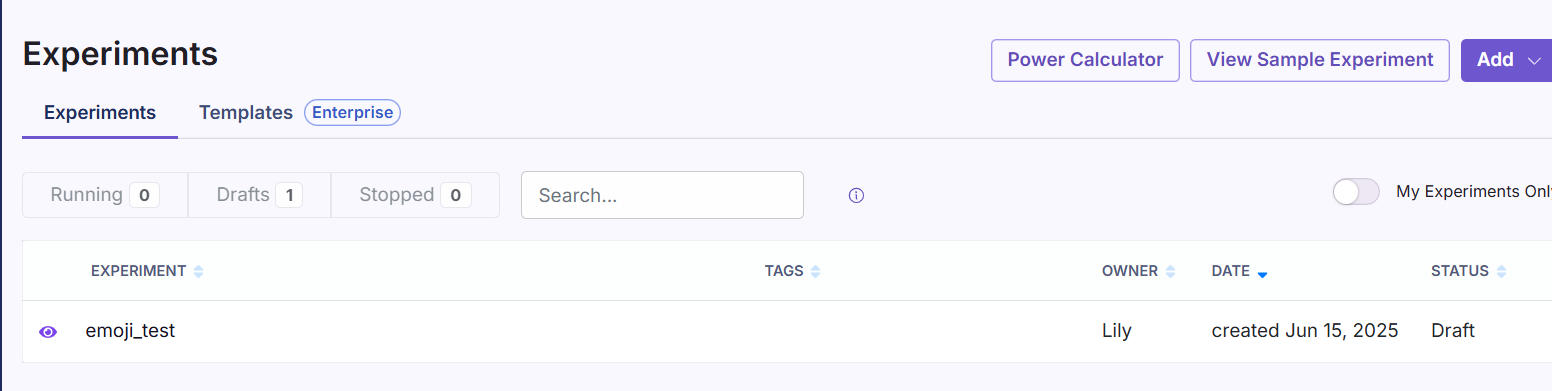

In [8]:
display(Image(filename='/content/drive/MyDrive/images/growthbook.jpg', width=700))

In [3]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import ttest_ind

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 9. Virtual A/B Testing Result Analysis
Suppose we get the experient result as follows:

Step 0 is Click Emoji Button, Step 1 is Emoji Panel Popup, Step 2 Click Specific Emoji, Step 3 Payment Guide Popu, Step 4 Click Payment Button, and Step5 Payment Succes.

In [26]:
# 📂 Load Dataset
df = pd.read_csv('/content/drive/MyDrive/marketing_AB.csv')

# 🧹 Clean Columns
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 🔍 Basic Overview
print("🔹 Shape of data:", df.shape)
print("🔹 Unique test groups:", df.test_group.unique())
df.head()


🔹 Shape of data: (6001, 9)
🔹 Unique test groups: ['a' 'b']


,Unnamed:_0,user_id,test_group,converted,step1,step2,step3,step4,step5
0,0,1069124,a,True,1,1,1,1,1
1,1,1119715,a,True,1,1,1,1,1
2,2,1144181,a,False,1,1,0,0,0
3,3,1435133,a,False,1,1,0,0,0
4,4,1015700,a,False,1,1,1,0,0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


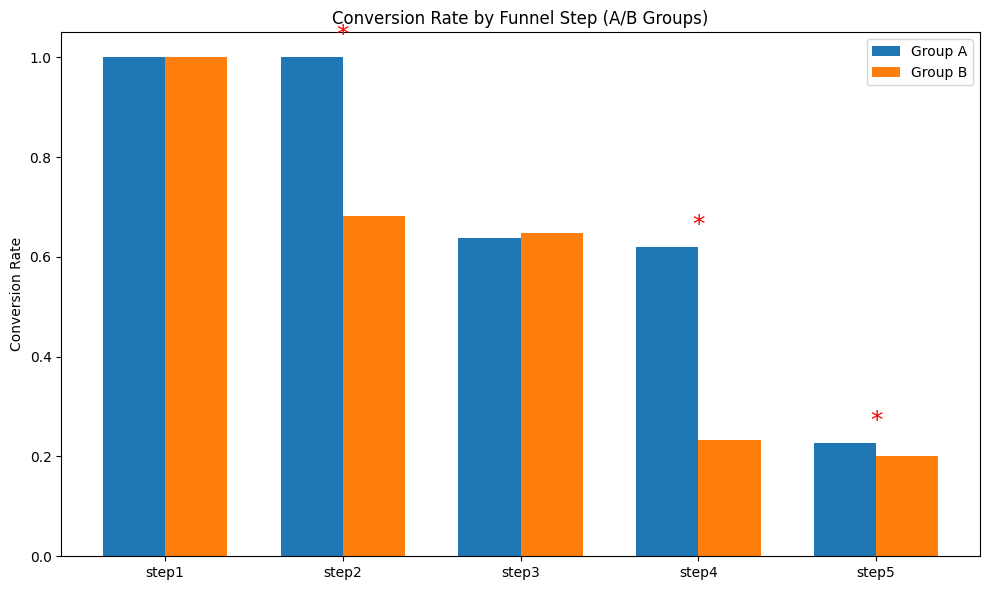

,Step,Group A,Group B,p-value,Significant
0,step1,1.000,1.000,NaN,False
1,step2,1.000,0.682,0.0000,True
2,step3,0.638,0.647,0.5110,False
3,step4,0.619,0.233,0.0000,True
4,step5,0.228,0.200,0.0068,True


In [27]:
from scipy.stats import ttest_ind

# Step 1: Preprocess Data
steps = ['step1', 'step2', 'step3', 'step4', 'step5']
df[steps] = df[steps].fillna(0).astype(int)

# Step 2: Analyze conversion rates and t-tests
conversion_data = {
    'Step': [],
    'Group A': [],
    'Group B': [],
    'p-value': [],
    'Significant': []
}

for step in steps:
    a_values = df[df['test_group'] == 'a'][step]
    b_values = df[df['test_group'] == 'b'][step]

    # Mean conversion rates
    a_rate = a_values.mean()
    b_rate = b_values.mean()

    # Independent T-test
    t_stat, p_val = ttest_ind(a_values, b_values, equal_var=False)

    # Record
    conversion_data['Step'].append(step)
    conversion_data['Group A'].append(round(a_rate, 3))
    conversion_data['Group B'].append(round(b_rate, 3))
    conversion_data['p-value'].append(round(p_val, 4))
    conversion_data['Significant'].append(p_val < 0.05)

# Step 3: Create DataFrame
conversion_df = pd.DataFrame(conversion_data)

# Step 4: Plotting
x = np.arange(len(steps))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, conversion_df['Group A'], width, label='Group A')
bar2 = ax.bar(x + width/2, conversion_df['Group B'], width, label='Group B')

# Add chart details
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rate by Funnel Step (A/B Groups)')
ax.set_xticks(x)
ax.set_xticklabels(conversion_df['Step'])
ax.legend()

# Add significance stars
for i, p in enumerate(conversion_df['p-value']):
    if p < 0.05:
        max_height = max(conversion_df['Group A'][i], conversion_df['Group B'][i])
        ax.text(i, max_height + 0.02, '*', ha='center', va='bottom', fontsize=18, color='red')

plt.tight_layout()
plt.show()

# Step 5: Display results
conversion_df

#### 1.Insights
📘 Group A:
Step 0 → Step 3 → Step 4 → Step 5

Group A skips intermediate filtering and sends more users directly into the payment process.

📙 Group B:
Step 0 → Step 1 → Step 2 → Step 3 → Step 4 → Step 5

Group B introduces filters in Step 1 and Step 2 to pre-qualify users, resulting in fewer reaching payment.

🧠 Interpretation
✅ Step 2 Filtering (Group B only):
Group B uses Step 2 to filter users, allowing only ~68.2% to proceed.

This may remove less-engaged users and reduce clutter, but at the cost of reducing volume into the payment funnel.

📉 Step 4 and Step 5 (Payment Flow):
Despite pre-filtering, Group B still converts fewer users to click/pay:

Step 4: Group A 61.9% vs Group B 23.3%

Step 5: Group A 22.8% vs Group B 20.0%

These differences are statistically significant, suggesting Group A is more effective at pushing users toward conversion.

| Aspect             | Group A                      | Group B                                |
| ------------------ | ---------------------------- | -------------------------------------- |
| 🧭 Traffic Flow    | Broad (no filtering)         | Narrowed (filters at Step 1/2)         |
| 🎯 Payment Clicks  | High (61.9%)                 | Low (23.3%)                            |
| 💰 Payment Success | Higher absolute rate (22.8%) | Slightly lower (20.0%)                 |
| 🧪 Filtering Value | N/A                          | Filters reduce volume, slight QoQ gain |

#### 2.Recommendation
Group A produces higher conversion in absolute terms without additional filtering. If the business goal is maximizing overall revenue or payment events, Group A is preferable.

However, if Group B’s filters are designed to:

Reduce support load,

Exclude bots/low-intent users,

Improve long-term retention,